## 1. Загрузка данных

In [36]:
#импортируем необходимые библиотеки для дальнейшей работы
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools
from sklearn.cluster import KMeans
import numpy as np

In [37]:
#В переменной gym_churn сохраним датасет
gym_churn = pd.read_csv('gym_churn.csv')

## 2. Исследовательский анализ данных

In [38]:
# прочитаем данные
gym_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Посмотрим на датасет методом describe: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения.

In [39]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Так же посотрим на типы данных:

In [40]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Для удобства приведем названия стобцов к нижнему регистру:

In [41]:
gym_churn.columns = gym_churn.columns.str.lower()

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [42]:
gym_churn.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


### вывод:
основные отличия наблюдаются в признаках: partner, promo_friends, contract_period, age, avg_class_frequency_total, lifetime, avg_class_frequency_current_month, avg_additional_charges_total.
для тех кто ушел в отток характерны наибольшие значения в признаках partner и  promo_friends, судя по всему приобретение абонимета по скидке не сильно мотивирует людей на занятие спортом, но в то же время в признаке avg_additional_charges_total посетители ушедшие в отток имеют наибольшие значения, возможно это связано с тем что среднее значения посещения в неделю за предыдущий месяц больше чем у посетителей не ушедщих в отток. Стабильнее всего посещают фитнес центр те кто берет абонимент на 1-3 месяца, при этом не используя скидки и промокоды.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

In [43]:
#напишем функцию, которая на вход будет принимать два параметра набор данных и поле по которому нужно построить гистограмму
def churn_distplot(df, x_label):
    sns.distplot(df[x_label], kde=True)
    plt.show()

In [44]:
# В переменной gym_churn_0 сохраним строки с фактом оттока равному 0 
#в переменной gym_churn_1 сохраним строки с фактом оттока равным 1 
gym_churn_0 = gym_churn.query('churn == 0')
gym_churn_1 = gym_churn.query('churn == 1')
columns_name = gym_churn.columns.to_list()

Выведем гистограммы с фактом оттока равным 0:

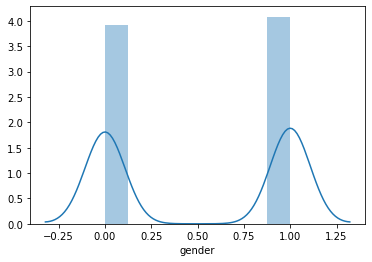

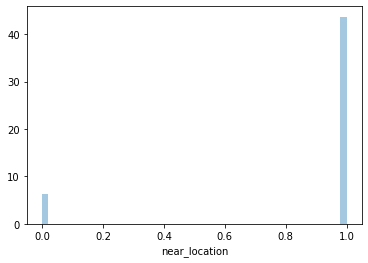

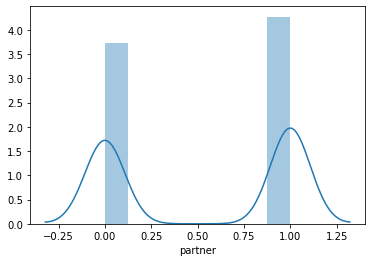

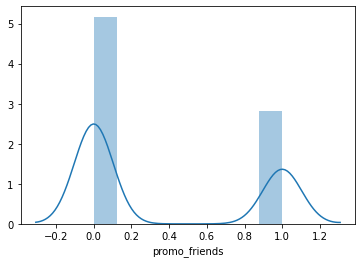

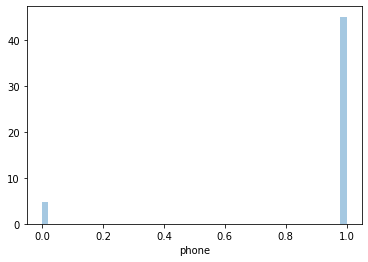

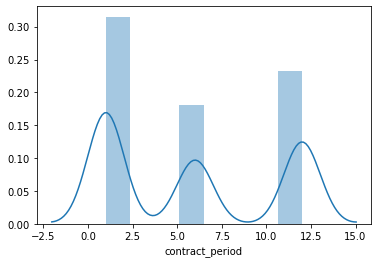

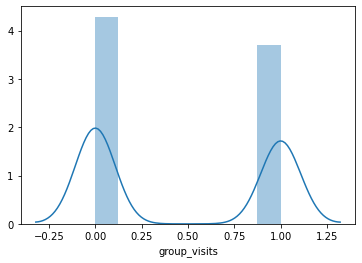

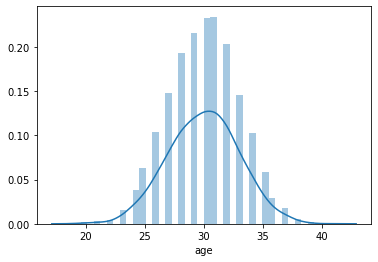

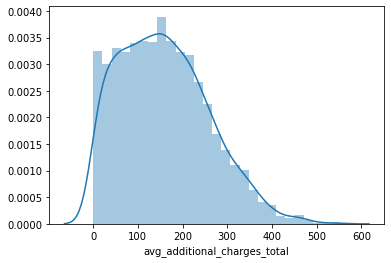

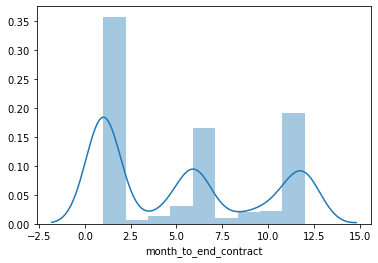

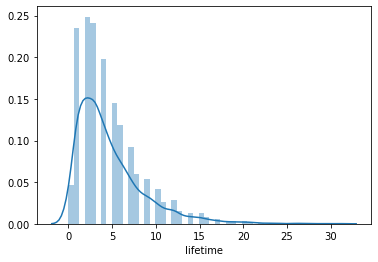

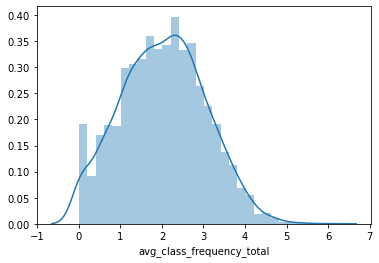

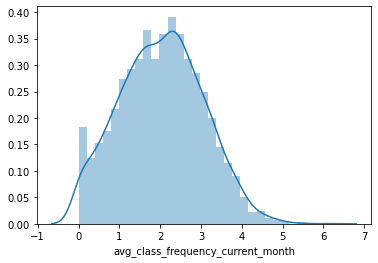

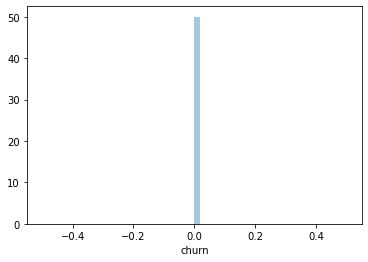

In [45]:
for i in columns_name:
    churn_distplot(gym_churn_0, i)

Выведем гистрграммы с фактом оттока равным 1

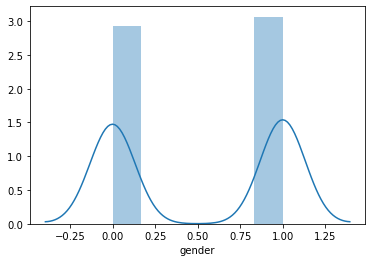

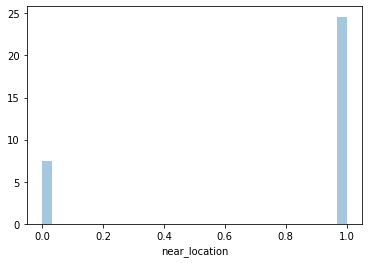

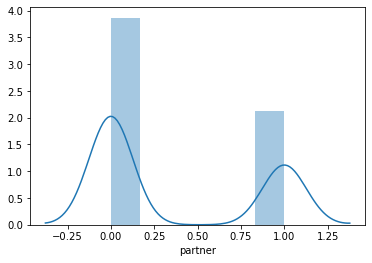

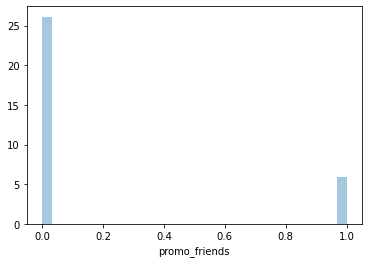

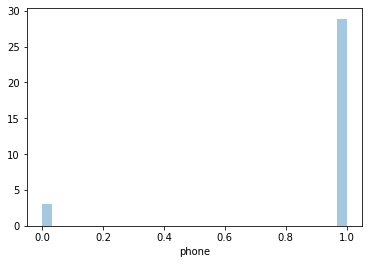

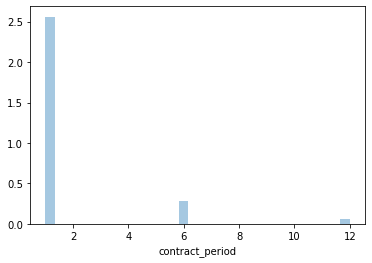

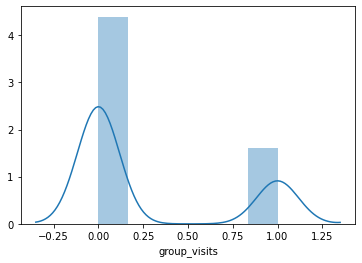

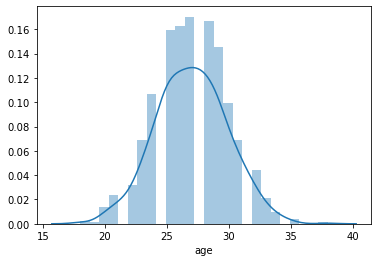

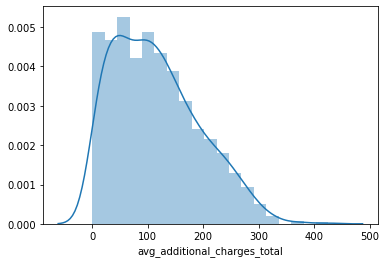

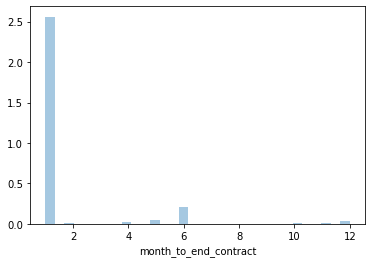

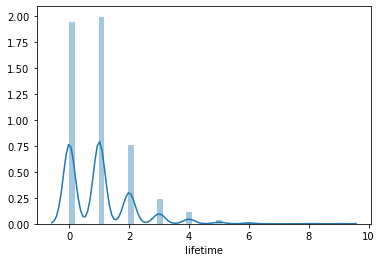

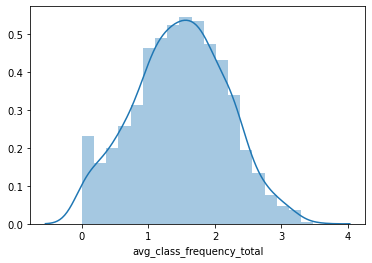

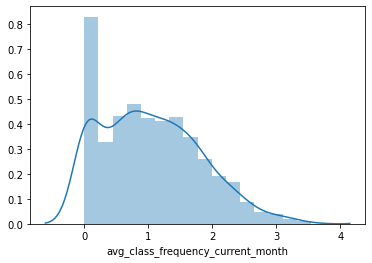

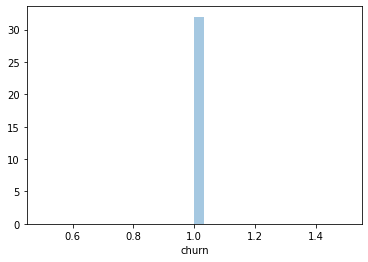

In [46]:
for i in columns_name:
    churn_distplot(gym_churn_1, i)

In [47]:
#напишем фукцию для построения распределенний
#на выход йункция принимает 4 парамертра, датасет, поля по которым необходимо построить рапределение
# и факт оттока
def churn_scater(df, x_label, y_label, churn):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_label], df[y_label], hue = df['churn'],
            palette = 'Paired')
    plt.title('{} vs {}'.format(x_label, y_label))
    plt.show()

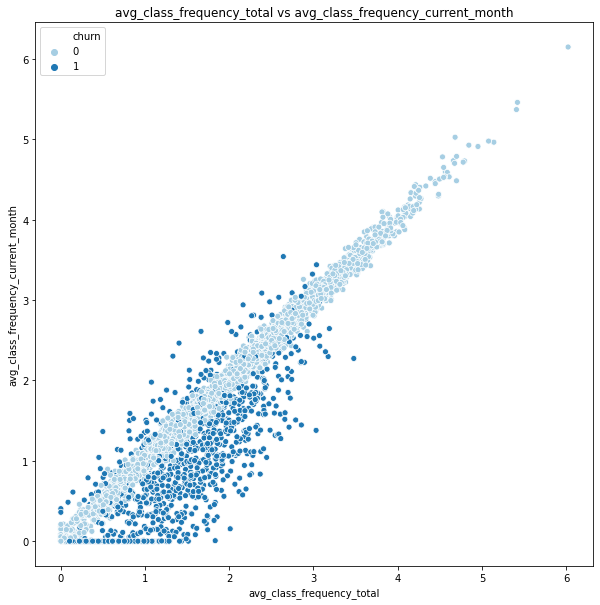

In [48]:
churn_scater(gym_churn, 'avg_class_frequency_total', 'avg_class_frequency_current_month', gym_churn['churn'])

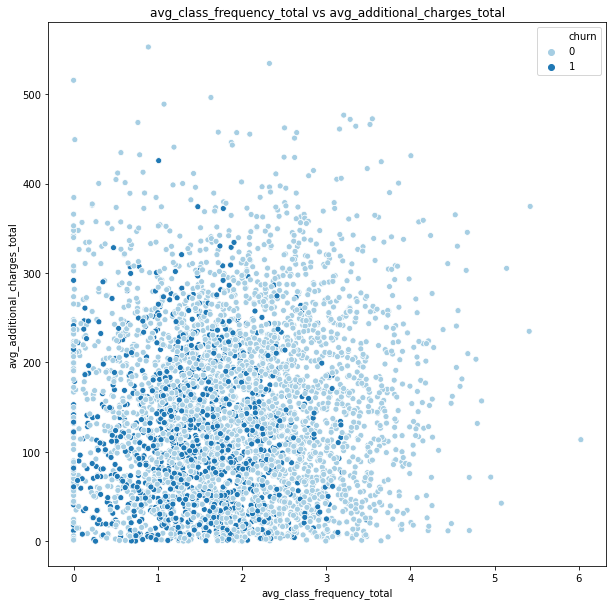

In [49]:
churn_scater(gym_churn, 'avg_class_frequency_total', 'avg_additional_charges_total', gym_churn['churn'])

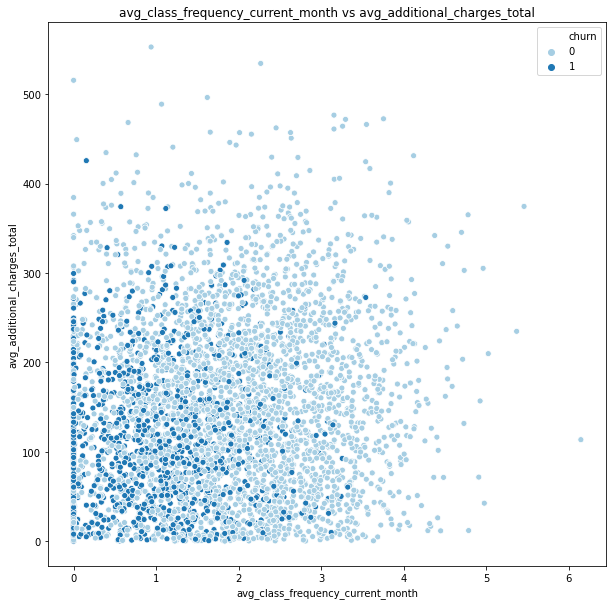

In [50]:
churn_scater(gym_churn, 'avg_class_frequency_current_month', 'avg_additional_charges_total', gym_churn['churn'])

Построим матрицу корреляций и отобразим её:

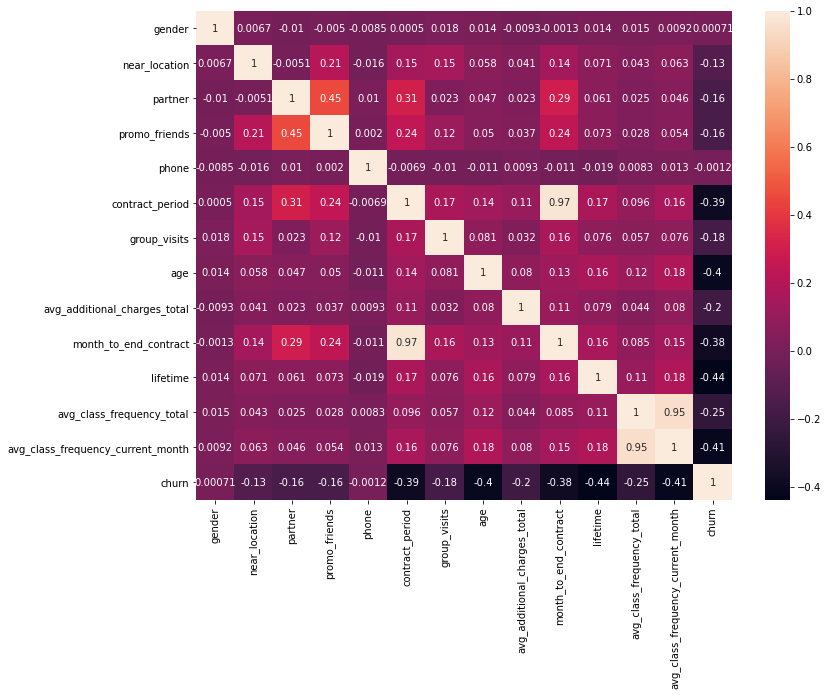

In [51]:
corr = gym_churn.corr()
#зададм размер граффику
plt.figure(figsize=(12,9))
#построим тепловую карту
ax_heatmap = sns.heatmap(corr, annot=True)

#### Вывод:
По матрице корреляций видно что между собой хорошо коррелируют avg_class_frequency_total и avg_class_frequency_current_month,
так же month_to_end_contract_contract_period

### Вывод:

На данном этапе работы выявленно:
- в данных отстутсвуют пропуски,
- все столбцы имеют правильный тип данных;
- для удобства, к нижнему регистру были приведены названия столбцов;
- матрица корреляций показывает, что нет признаков, которые с высокой вероятностью сообщают правильный ответ.

## 3. Построим модель прогнозирования оттока пользователей

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

Разделим данные на обучающую и валидационную выборку функцией train_test_split()

In [52]:
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

In [53]:
# разделим е модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. Сначала логистической регрессией:

In [54]:
# задаlим алгоритм для нашей модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train, y_train) 

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)

probabilities = model.predict_proba(X_test)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.82
Recall: 0.80


Случайный лес:

In [55]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [56]:
# Преобразуем обучающий и валидационные наборы данных
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [57]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # Ваш код здесь
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


#### Вывод: 
на сновании метрик Accuracy, Precision и Recall лучший результат показала модель с использованием логистической регрессии.

## 4. Сделаем кластеризацию пользователей

Стандартизируем данные:

In [58]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn.drop('churn', axis = 1))

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму:

In [59]:
linked = linkage(x_sc, method = 'ward')

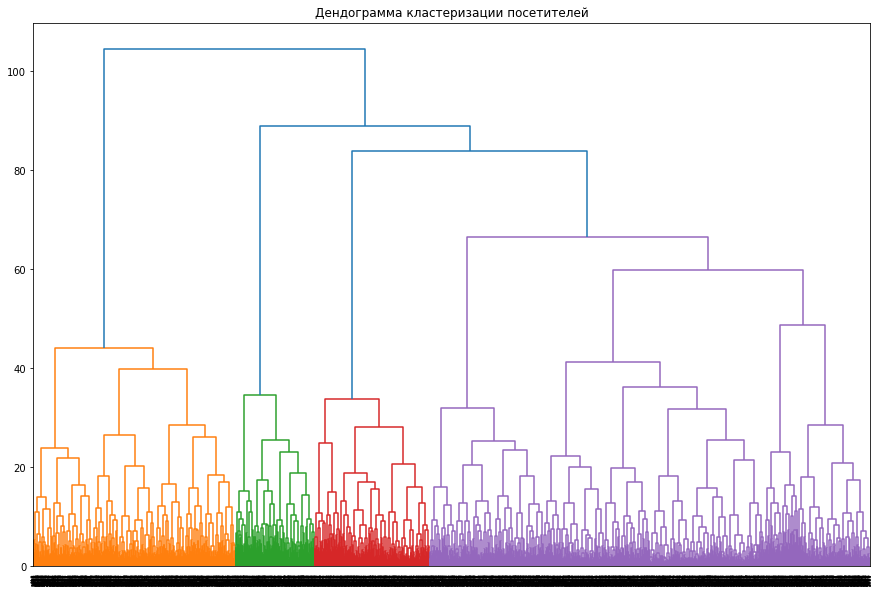

In [60]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Дендограмма кластеризации посетителей')
plt.show()

Судя по дендограмме можно выделить 4 кластера

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов: 

In [61]:
# задаём модель k_means с числом кластеров 3
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(gym_churn.drop('churn', axis=1))

# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = pd.DataFrame(gym_churn.groupby(['cluster_km']).mean())

In [62]:
clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.515534,0.838835,0.452427,0.279612,0.897087,4.308738,0.405825,28.971845,105.830935,4.003883,3.556311,1.853561,1.709490,0.333981
1,0.510903,0.844237,0.495327,0.319834,0.902388,4.751817,0.423676,29.402908,174.837664,4.372793,3.748702,1.894100,1.784568,0.226376
2,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470
3,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
4,0.507767,0.825243,0.488350,0.294175,0.908738,4.194175,0.388350,28.908738,35.532545,3.850485,3.382524,1.836715,1.692245,0.350485


Сохраним каждый кластер в отедльной перемнной и для кождого отдельного кластера построим гистограмму чтобы посмотреть распределние

In [63]:
cluster_0 = gym_churn.query('cluster_km == 0')
cluster_1 = gym_churn.query('cluster_km == 1')
cluster_2 = gym_churn.query('cluster_km == 2')
cluster_3 = gym_churn.query('cluster_km == 3')
cluster_4 = gym_churn.query('cluster_km == 4')

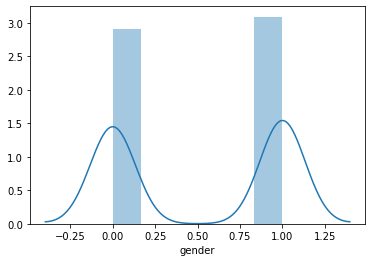

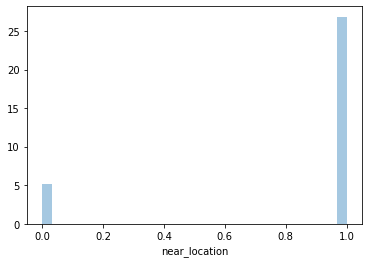

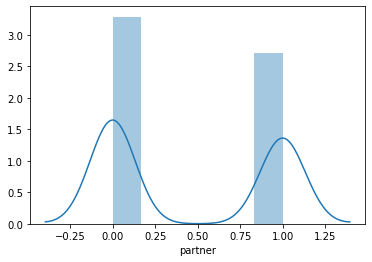

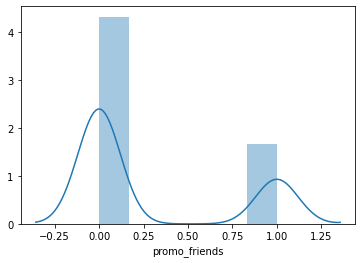

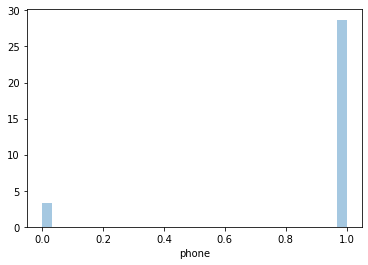

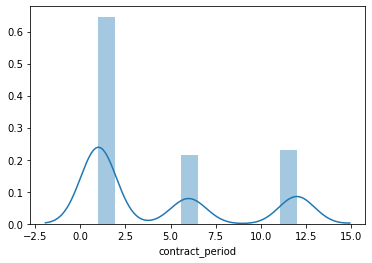

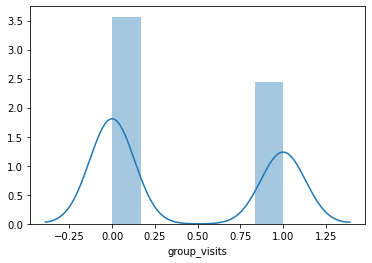

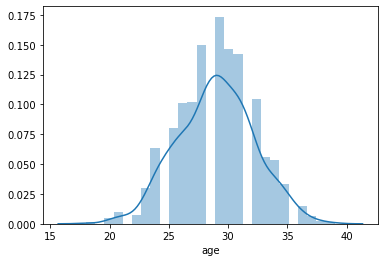

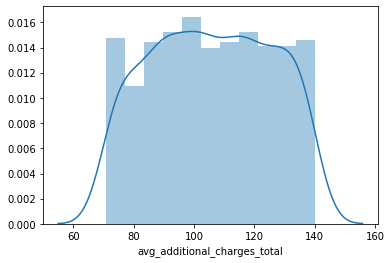

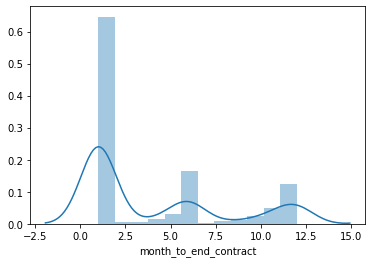

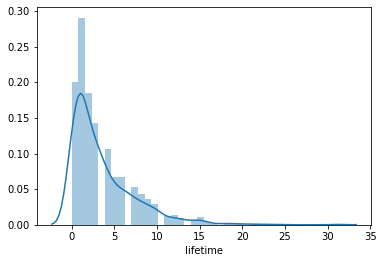

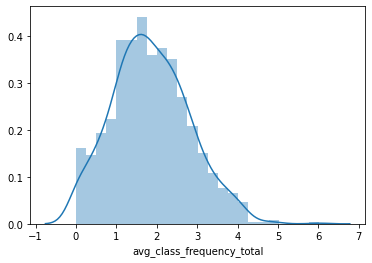

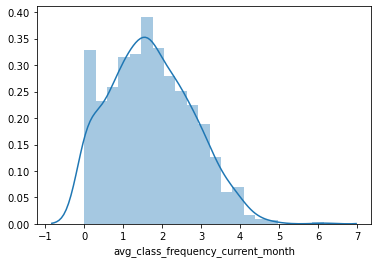

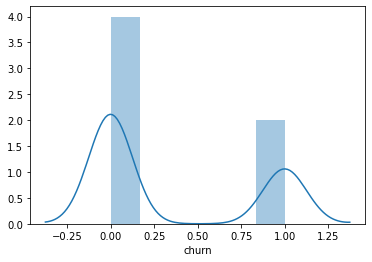

In [64]:
for i in columns_name:
    churn_distplot(cluster_0, i)

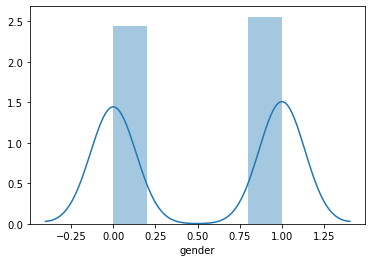

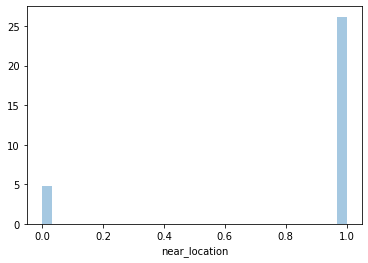

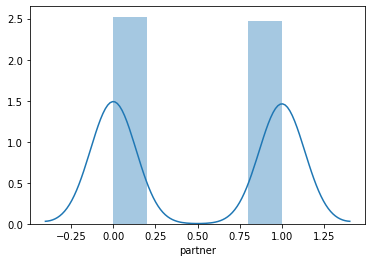

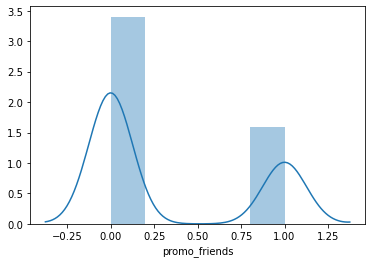

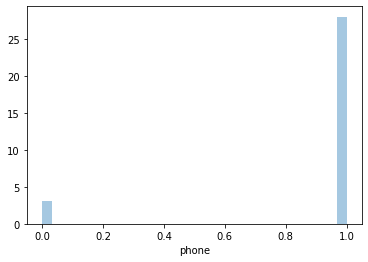

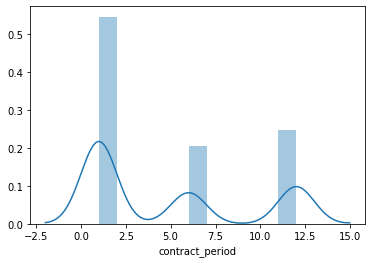

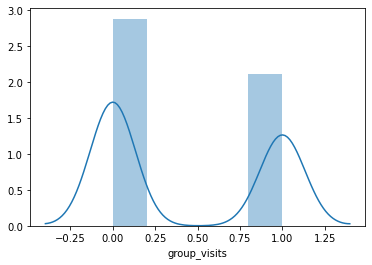

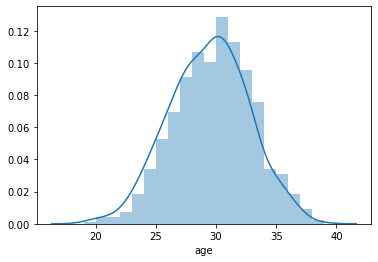

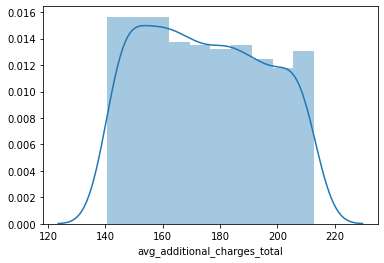

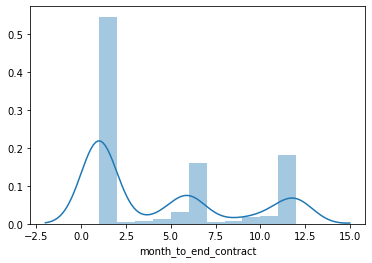

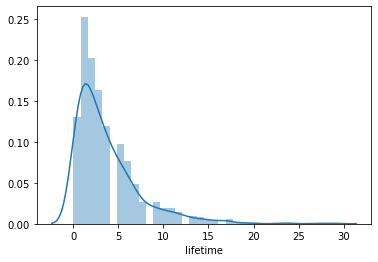

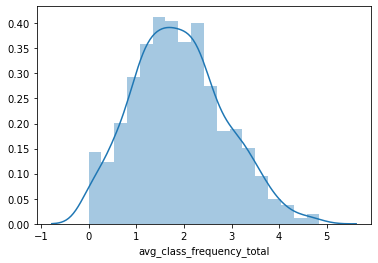

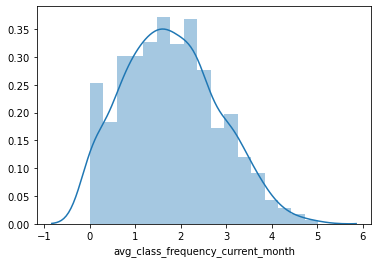

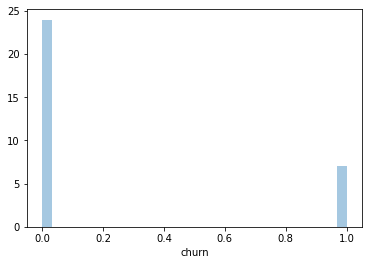

In [65]:
for i in columns_name:
    churn_distplot(cluster_1, i)

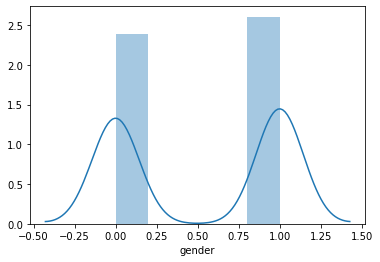

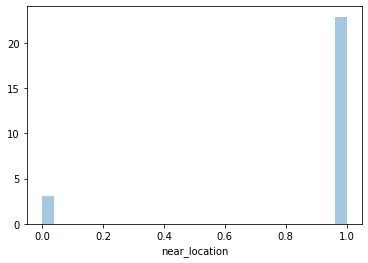

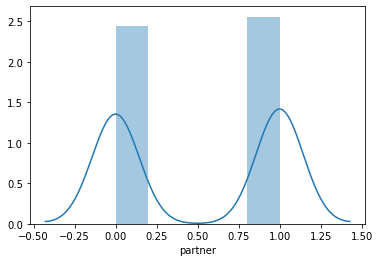

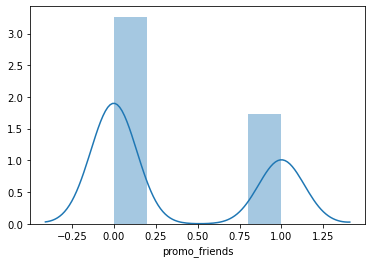

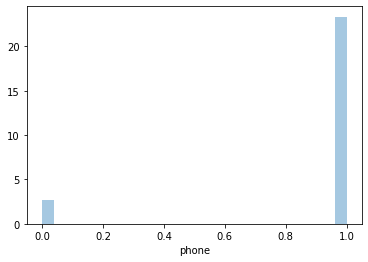

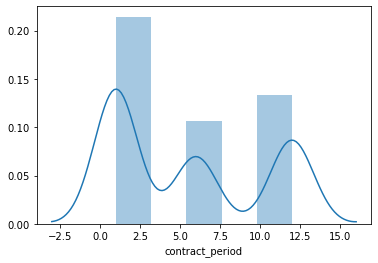

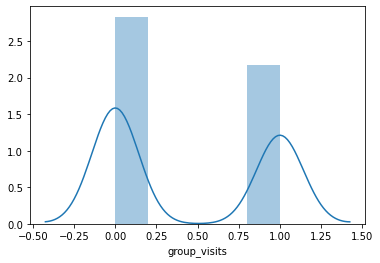

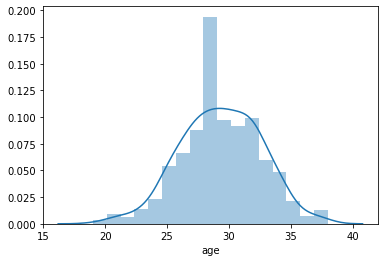

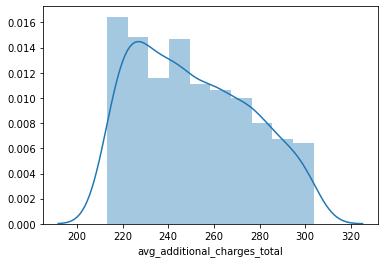

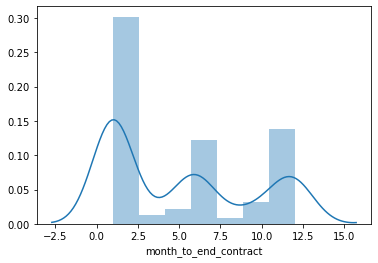

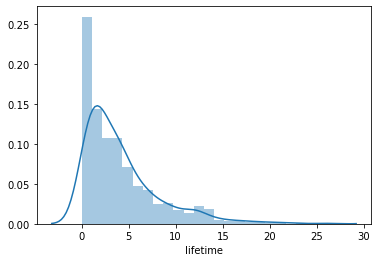

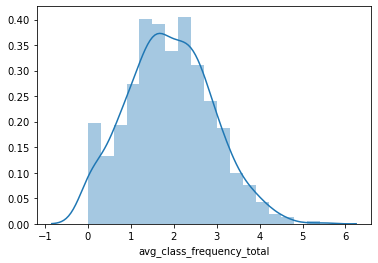

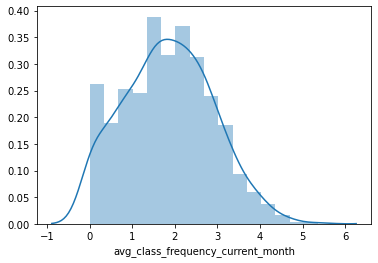

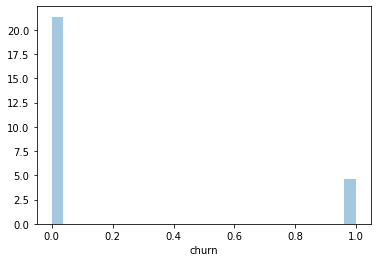

In [66]:
for i in columns_name:
    churn_distplot(cluster_2, i)

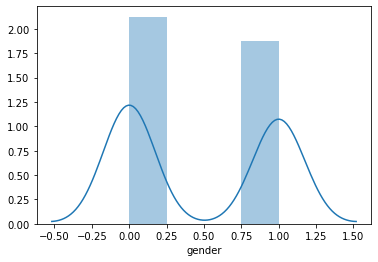

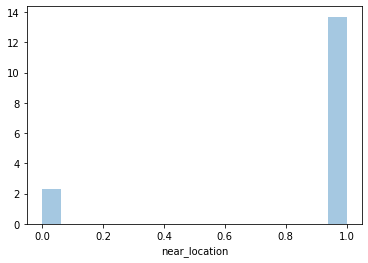

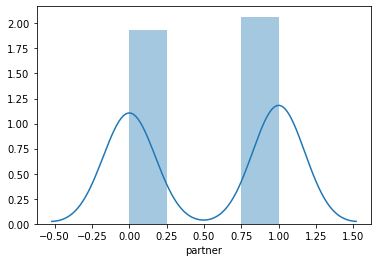

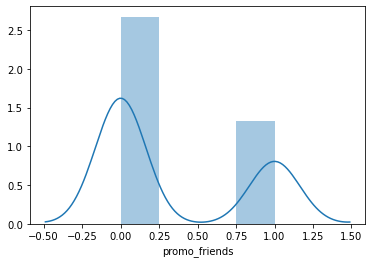

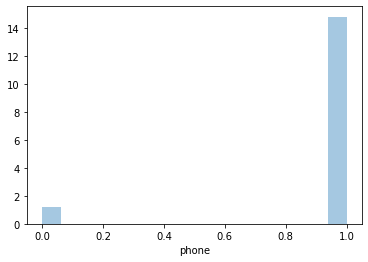

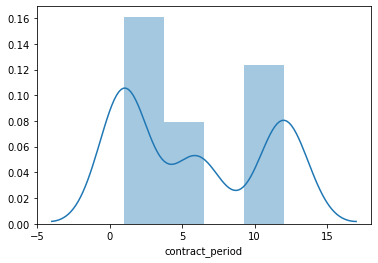

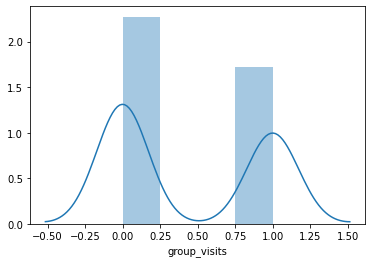

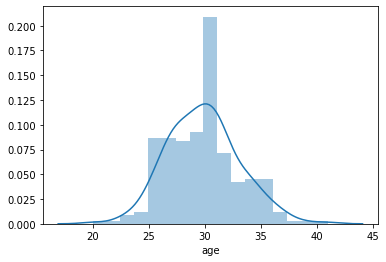

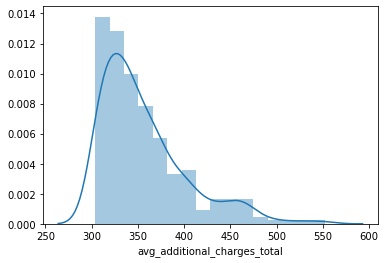

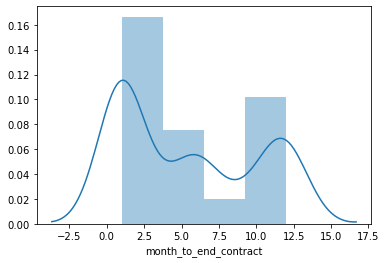

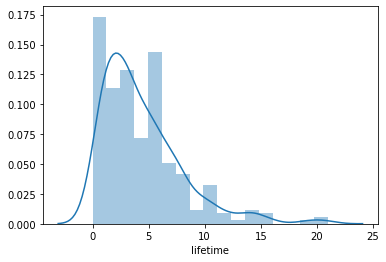

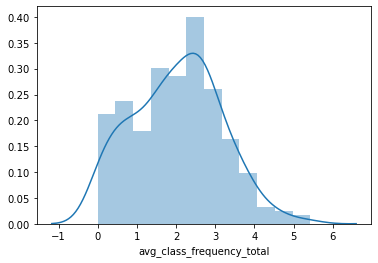

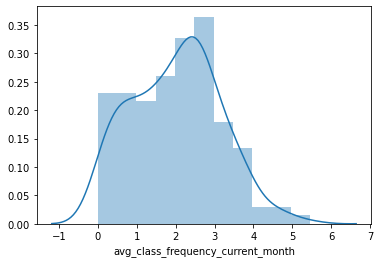

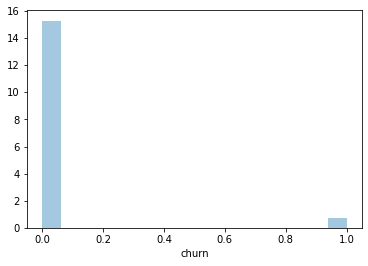

In [67]:
for i in columns_name:
    churn_distplot(cluster_3, i)

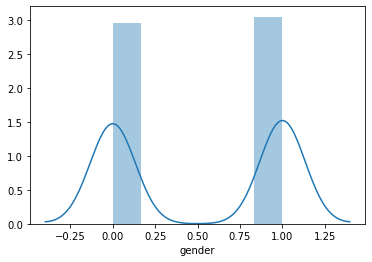

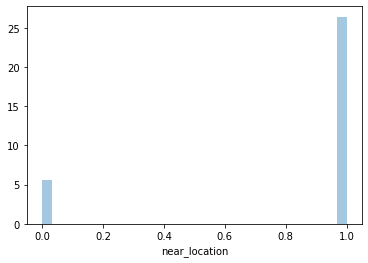

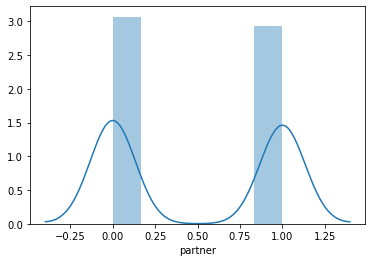

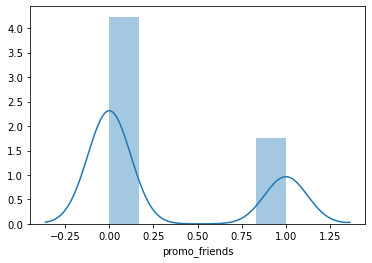

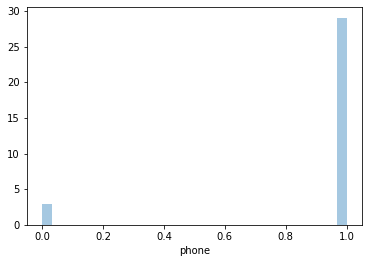

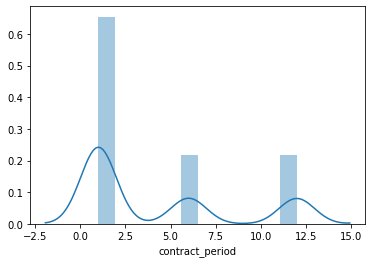

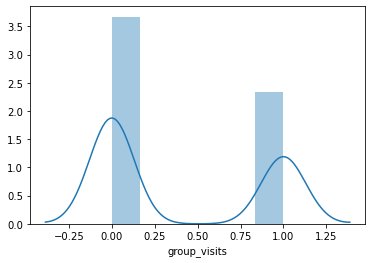

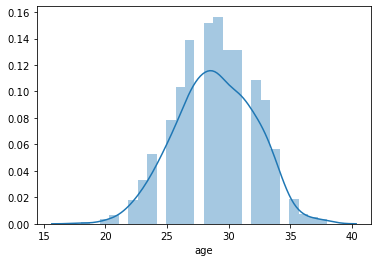

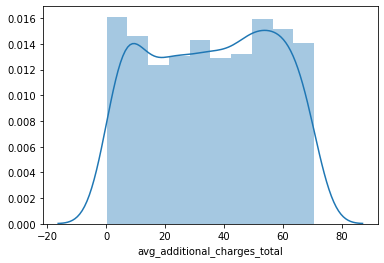

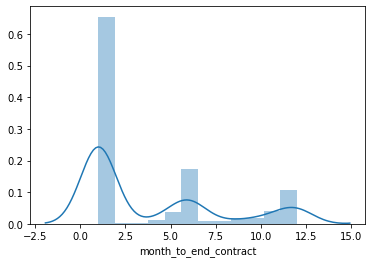

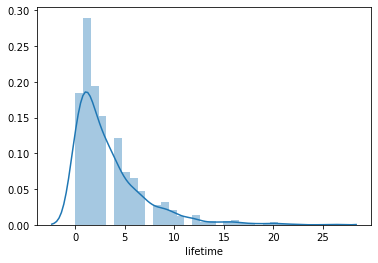

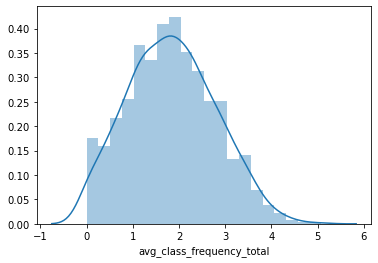

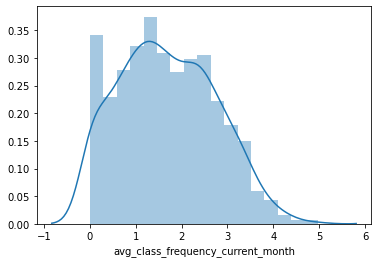

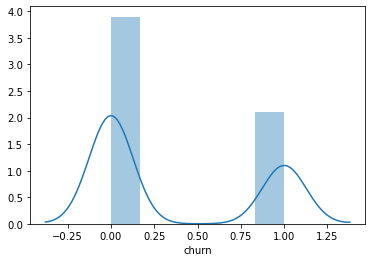

In [68]:
for i in columns_name:
    churn_distplot(cluster_4, i)

Для каждого полученного кластера посчитаем долю оттока:

In [69]:
gym_churn.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.333981
1    0.226376
2    0.178470
3    0.044280
4    0.350485
Name: churn, dtype: float64

In [70]:
clusters.sort_values(by='churn')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
3,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
2,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470
1,0.510903,0.844237,0.495327,0.319834,0.902388,4.751817,0.423676,29.402908,174.837664,4.372793,3.748702,1.894100,1.784568,0.226376
0,0.515534,0.838835,0.452427,0.279612,0.897087,4.308738,0.405825,28.971845,105.830935,4.003883,3.556311,1.853561,1.709490,0.333981
4,0.507767,0.825243,0.488350,0.294175,0.908738,4.194175,0.388350,28.908738,35.532545,3.850485,3.382524,1.836715,1.692245,0.350485


### Вывод:
По результатам полученым при расчете доли оттока самым надежным кластером явлется 2, наиболее вероятен отток во 3 и 0 кластере. Для склонных к оттоку кластеров, характерна **наименьшая** продолжительность абонемента, суммарная выручка и т.п.

## 5. Выводы и базовые рекомендации по работе с клиентами

### Общие выводы по работе:
- в данных отстутсвуют пропуски;
- все столбцы имеют правильный тип данных;
- для удобства, к нижнему регистру были приведены названия столбцов;
- средние значения признаков имеют нормальное рапределение;
- матрица корреляций показывает, что нет признаков, которые с высокой вероятностью сообщают правильный ответб;
- на сновании метрик Accuracy, Precision и Recall лучший результат показала модель с использованием логистической регрессии;
- самым надежным кластером явлется 3 и 1, наиболее вероятен отток во 2 и 0 кластере;
- средние значения признаков в кластерах с наименьшей вероятностью оттока имеют показатели превышающие средние значения других кластеров и уже оттуда видно какие кластеры более устойчивы к оттоку.
### Рекомендации:
- возможно стоит попробовать сделать смс рассылку для пользователей попавших в кластер с наиболшей вероятность оттока для их удержания;
- предложить скидку для удержания посетителей на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон
- так же можно предложить бесплтаную тренеровку с инструктором.